# CUI2VEC PCA+tSNE Analysis

In [1]:
# Define imports
import random
from numpy import asarray
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import sys
import pickle
import os
from collections import defaultdict
import time
import numpy as np
import csv
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Step 1: Read in relevant Data Files

In [2]:
def read_csv_to_dict(file_path: str, key: int, value: int):
    ret_dict = {}
    with open(file_path, newline='') as csvfile:
        data = csv.reader(csvfile, delimiter=',')
        for row in data:
            ret_dict[row[key]] = row[value]
    print("Reading {} complete!".format(file_path))
    return ret_dict

In [3]:
def get_category_dict():
    category_dict = {
        'Circulatory': 0,
        'Dermatologic': 4,
        'Endocrine & Immune': 6,
        'Gastrointestinal': 1,
        'Genitourinary': 1, 
        'Hematologic': 4,
        'Infectious': 6,
        'Injury': 2,
        'Injury & Poisoning': 2,
        'Poisoning': 2,
        'Musculoskeletal': 2,
        'Neurologic': 3,
        'Other': 4,
        'Obstetric': 5,
        'Neoplastic': 4,
        'Psychiatric': 3,
        'Respiratory': 0,
        'Substance use': 2}
    #use to_categorical()
    return category_dict

In [4]:
with open('data_X_data_Y_CUI2VEC.pkl', 'rb') as handle:
    a,b = pickle.load(handle)

In [5]:
print(a.shape, b.shape)

(291750, 2, 311) (291750,)


(0.0, 65170.0)

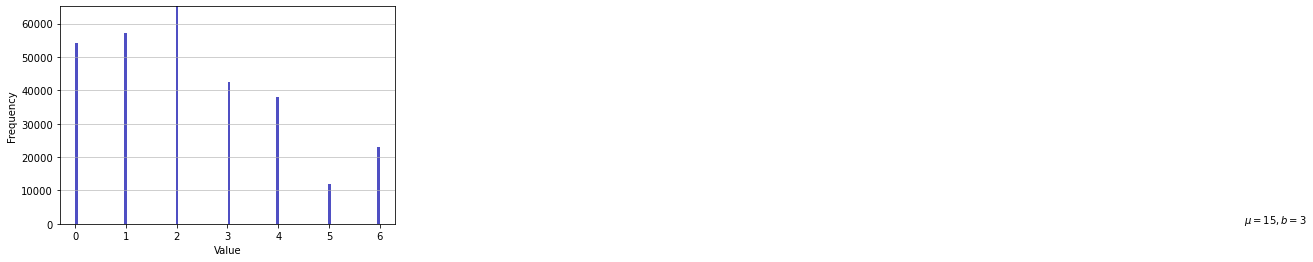

In [6]:
n, bins, patches = plt.hist(x=b, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

##  Step 2: Prepare the dataset

In [7]:
NUM_CLASSES = 7

In [18]:
def get_label2className_dict():
    '''
    Function to create reverse map of labels to category name
    '''
    category_dict = {
        0:'Cardio-Resp',
        1:'Abdominal',
        2:'Injury/Subst/Poison', 
        3:'NeuroPsych',
        4:'Other',
        5:'Obstetric',
        6:'Infection-Immune'
    }
    #use to_categorical()
    return category_dict

In [27]:
N= 10000
class_label_ids = {}
for c in range(NUM_CLASSES):
    class_ids = random.sample(list(np.hstack(np.argwhere(b==c))), N//5)
    class_label_ids[c] = class_ids

df_entries = []
labels = []
for k,v in class_label_ids.items():
    for i in v:
        df_entries.append(np.array(a[i,0,:]))
        labels.append(k)

In [28]:
df_entries = np.vstack(df_entries)
df = pd.DataFrame(df_entries)
df['label'] = pd.DataFrame(labels)
# df['label'] = df['label'].apply(lambda i: str(i))

In [29]:
df

,0,1,2,3,4,5,6,7,8,9,...,302,303,304,305,306,307,308,309,310,label
0,0.584746,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.034039,0.068802,-0.039018,0.026616,0.051934,-0.230787,0.041035,0.037650,-0.057062,0
1,0.703390,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.187166,0.298536,-0.018378,-0.128308,0.034253,-0.311352,0.191514,-0.065521,-0.059965,0
2,0.211864,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.012008,0.308437,0.010225,-0.062622,0.084895,-0.173822,0.045426,0.037627,-0.142132,0
3,0.686441,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.109250,0.027673,0.028191,0.158829,0.043011,-0.028085,0.143954,0.023139,0.071295,0
4,0.813559,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.092454,0.105014,0.042771,0.057674,-0.007375,-0.097809,0.066828,-0.102999,-0.037821,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.525424,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.062380,0.134715,-0.064612,0.023738,-0.013134,-0.346379,0.329777,0.080300,0.055468,6
13996,0.254237,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.137789,0.067302,0.095854,0.055581,-0.115952,-0.358873,0.048457,0.001516,-0.160240,6
13997,0.491525,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.092648,0.009307,0.043098,0.078491,0.009346,-0.130837,0.138953,0.017014,0.113304,6
13998,0.711864,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009699,-0.087961,-0.011083,-0.013062,0.003299,-0.265726,0.275845,0.065301,-0.040713,6


## Step 3: Do the standalone PCA Analysis

In [12]:
N = 10000
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
feat_cols = list(np.arange(11,df.shape[1]-1))
# print(feat_cols)

In [13]:
pca = PCA(n_components=3)

pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09603839 0.0481     0.04401655]


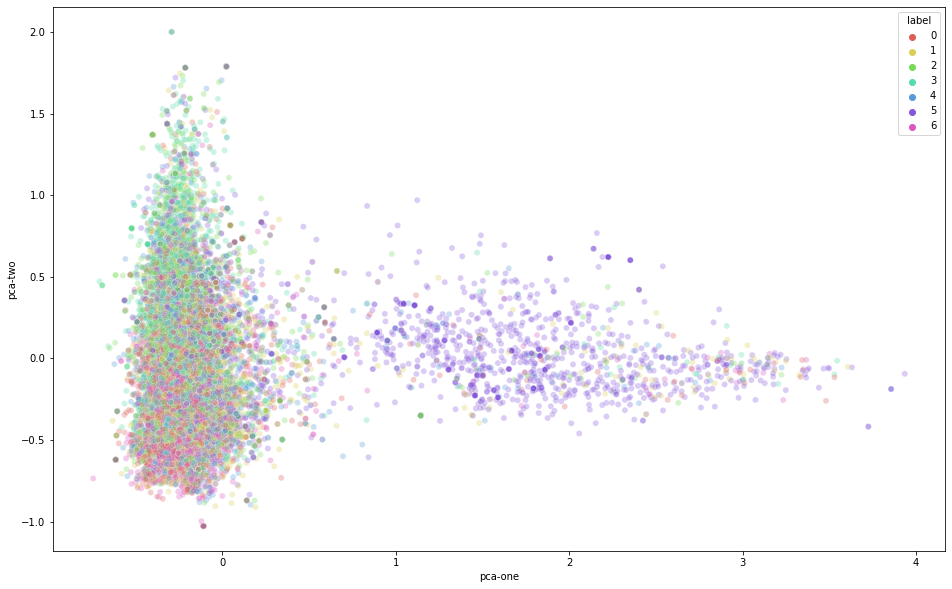

In [14]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", NUM_CLASSES),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)
plt.show()
# plt.savefig('PCA.png')

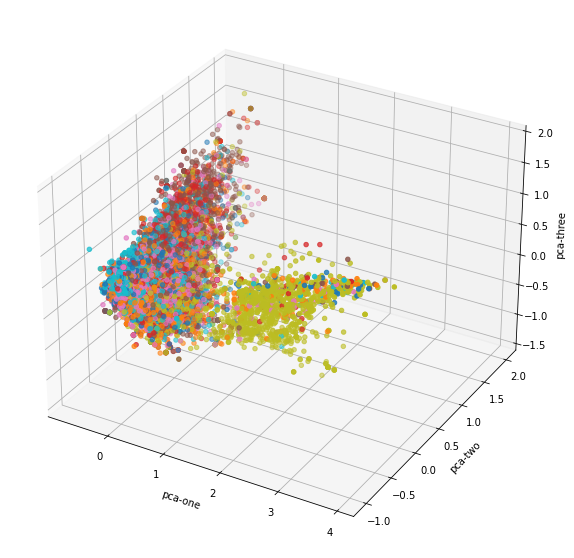

In [15]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

## Step 4: Do the tSNE Analysis (make sure to run the raw `df` prep code above in Step 2 )

Run PCA again for completion (to accord with the new data subset)

In [30]:
N = 10000

df_subset = df.iloc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

Explained variation per principal component: [0.09246898 0.04890024 0.04399953]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.783s...
[t-SNE] Computed neighbors for 10000 samples in 56.372s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.5893

<AxesSubplot:title={'center':'tSNE'}, xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

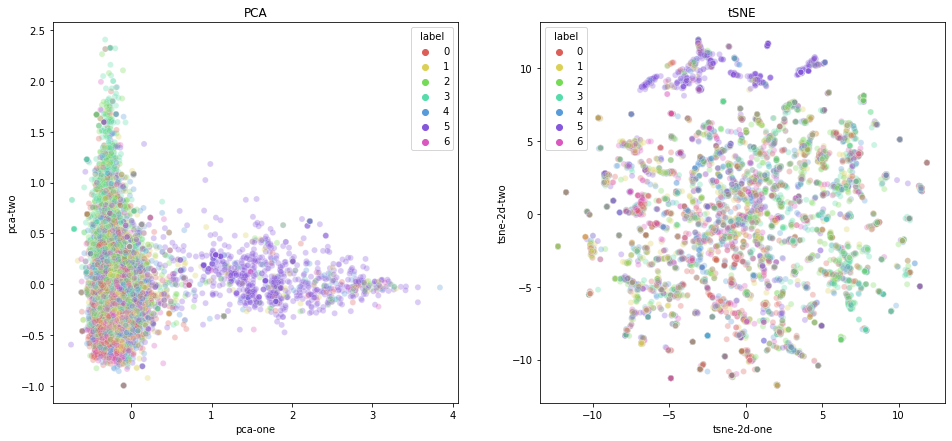

In [33]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", NUM_CLASSES),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('tSNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", NUM_CLASSES),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

## Step 5: Run tSNE after running PCA on it

In [37]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


df_subset['tsne-pca50-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca50-two'] = tsne_pca_results[:,1]

Cumulative explained variation for 50 principal components: 0.7320697083141272
t-SNE done! Time elapsed: 30.386088609695435 seconds


<AxesSubplot:title={'center':'tSNE on PCA reduced data'}, xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

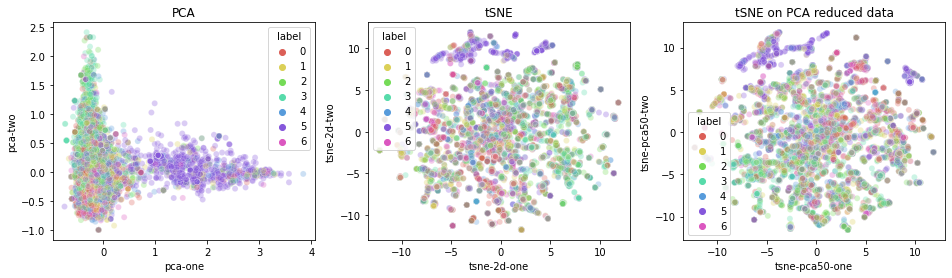

In [38]:
plt.figure(figsize=(16,4))

ax1 = plt.subplot(1, 3, 1)
ax1.set_title('PCA')
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", NUM_CLASSES),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
ax2.set_title('tSNE')
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", NUM_CLASSES),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
ax3.set_title('tSNE on PCA reduced data')
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="label",
    palette=sns.color_palette("hls", NUM_CLASSES),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)